<a href="https://colab.research.google.com/github/slvrsrfrrr/Machine-Learning/blob/main/Make_More_Optimisation_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Optimisation

---
goal: to beat Andrej's loss of 2.17 by tweaking hyperparameters.



***results:***

*   **training loss: 2.017**
*   **validation loss: 2.088**


---


* batch size: 128
* 300 neuron hidden layers
* 10 dimensional embedding layer
* 3 character context
* xavier weight initialisation (tanh)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!wget -O /content/drive/MyDrive/names.txt https://raw.githubusercontent.com/slvrsrfrrr/datasets/main/names.txt

file_path = '/content/drive/MyDrive/names.txt'

words = open(file_path,'r').read().splitlines()

In [2]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline
import torch.nn.functional as F

turning each letter into an integer and creating a function to retreive the letter again:

In [3]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.']=0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [4]:
def build_dataset(words):

  block_size = 3
  X, Y = [], []

  for w in words:
      #print(w)
      context = [0] * block_size
      for ch in w + '.':
          ix = stoi[ch]
          X.append(context)
          Y.append(ix)
          # Print the current context and the corresponding character
          #print(''.join(itos[i] for i in context), '---->', itos[ix])
          context = context[1:] + [ix]

  # Convert the lists X and Y into torch tensors
  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape,Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1=int(0.8*len(words))
n2=int(0.9*len(words))

Xtr,  Ytr  = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte,  Yte  = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [10]:
import torch.nn.init as init

In [12]:
#10 dimensional embedding vector with 200 neuron hidden layer.

g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,10), generator = g)
W1 = torch.randn((30, 300), generator = g)
b1 = torch.randn(300, generator = g)
W2 = torch.randn((300, 27), generator = g)
b2 = torch.randn(27, generator = g)
parameters = [C,W1,b1,W2,b2]

init.xavier_uniform_(W1)

# Apply Xavier initialization to W2
init.xavier_uniform_(W2)


sum(p.nelement() for p in parameters)

17697

In [13]:
for p in parameters:
  p.requires_grad=True

In [14]:
lri   = []
lossi = []
stepi = []


In [15]:
for i in range(100000):

  #minibatch
  ix = torch.randint(9,Xtr.shape[0],(128,))

  #forward pass
  emb = C[Xtr[ix]]
  h = torch.tanh(emb.view(-1,30) @ W1 +b1)
  logits = h @ W2 +b2
  loss = F.cross_entropy(logits, Ytr[ix])
  #print(loss.item())

  #backward pass
  for p in parameters:
    p.grad= None
  loss.backward()

  #update
  lr = 0.1 if i < 50000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  #trackstats
  #lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())

#print(loss.item())

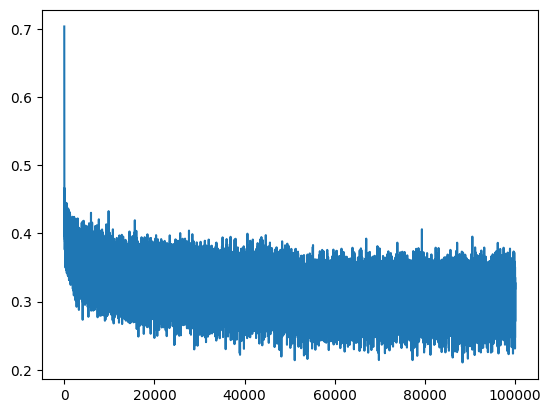

In [18]:
plt.plot(stepi,lossi)

In [16]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1,30) @ W1 +b1)
logits = h @ W2 +b2
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.0173, grad_fn=<NllLossBackward0>)

In [17]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1,30) @ W1 +b1)
logits = h @ W2 +b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.0885, grad_fn=<NllLossBackward0>)